In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz
import seaborn as sn

In [2]:
f = open('pulsar_stars.csv','rU')
pulsarStars = pd.read_csv(f)
pulsarStars.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [3]:
pulsarStars.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

In [4]:
pulsarStars.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


In [5]:
pulsarStars[(pulsarStars.target_class == 1)].describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,1639.000000,1639.000000,1639.000000,1639.000000,1639.000000,1639.000000,1639.000000,1639.000000,1639.0
mean,56.690608,38.710598,3.130655,15.553576,49.825995,56.468963,2.757069,17.931728,1.0
std,30.007707,8.033614,1.872861,13.997200,45.287932,19.731080,3.105945,50.896263,0.0
min,5.812500,24.772042,-0.094888,-1.139069,0.486622,7.658623,-1.862320,-1.874683,1.0
25%,31.777344,32.284803,1.556038,3.805492,12.759615,43.333643,0.756451,-0.228294,1.0
50%,54.296875,37.341297,2.961258,11.609644,33.494983,59.367088,1.918327,2.585145,1.0
75%,79.277344,43.759278,4.586930,24.881853,78.313545,70.985965,3.709978,13.469687,1.0
max,139.257812,83.796909,8.069522,68.101622,199.577759,109.655345,30.883882,1017.383180,1.0


In [6]:
pulsarStars[(pulsarStars.target_class == 0)].describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,16259.000000,16259.000000,16259.000000,16259.000000,16259.000000,16259.000000,16259.000000,16259.000000,16259.0
mean,116.562726,47.339741,0.210440,0.380844,8.863258,23.287984,8.862674,113.620344,0.0
std,17.475932,6.182929,0.334606,1.027791,24.411409,16.651426,4.238626,106.721930,0.0
min,17.210938,28.698714,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.0
25%,105.253906,43.384645,0.008650,-0.221980,1.857023,14.138541,6.615374,47.580165,0.0
50%,117.257812,47.485647,0.186665,0.124107,2.635452,17.618420,8.760010,90.674592,0.0
75%,128.285156,51.315620,0.392892,0.663383,4.227007,24.517386,10.935207,145.827223,0.0
max,192.617188,98.778911,4.785786,24.872429,223.392140,110.642211,34.539844,1191.000837,0.0


In [7]:
x = pulsarStars.drop('target_class', axis='columns')
y = pulsarStars.target_class

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) #separando datos de entrenamiento y prueba

# Arboles de decisión

### Gini profundidad 5

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
arbol = DecisionTreeClassifier()             #creando arbol de criterio gini
arbol.fit(x_train, y_train)                  #Entrenando arbol

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [11]:
arbol.score(x_test, y_test) #Probando el modelo

0.9670391061452513

In [12]:
arbol.score(x_train, y_train) #verificando si hay sobreentrenamiento

1.0

In [13]:
y_predicted_gini = arbol.predict(x_test)            #matriz de confusión
cm = confusion_matrix(y_test, y_predicted_gini)
cm

array([[3160,   62],
       [  56,  302]], dtype=int64)

Text(69,0.5,'Truth')

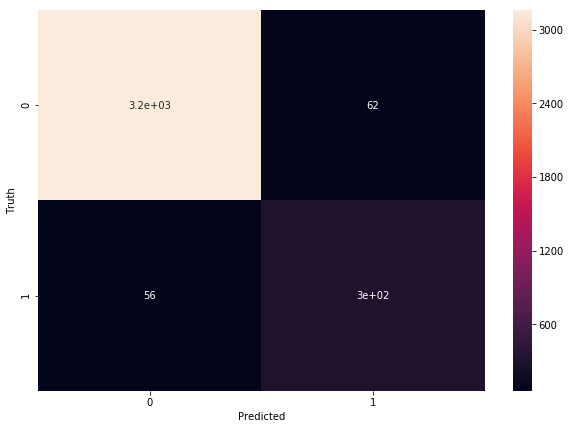

In [14]:
%matplotlib inline
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

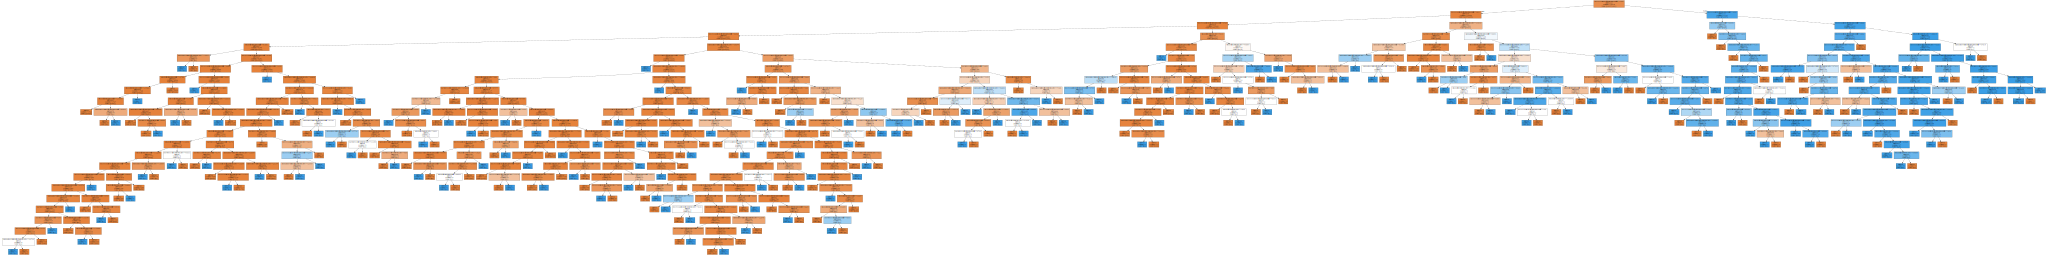

In [15]:
export_graphviz(arbol, out_file='arbol.dot', feature_names=x.columns.values, filled=True) #graficando arbol
with open('arbol.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

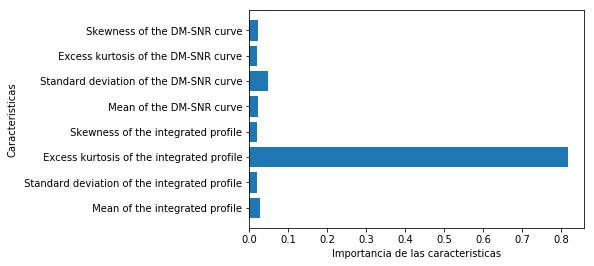

In [16]:
caract = x.shape[1]
plt.barh(range(caract), arbol.feature_importances_)
plt.yticks(np.arange(caract), x.columns.values)
plt.xlabel('Importancia de las caracteristicas')
plt.ylabel('Caracteristicas')
plt.show()

### Entropy

In [17]:
arbolE = DecisionTreeClassifier(criterion='entropy')  #creando modelo
arbolE.fit(x_train, y_train)                         #entrenando modelo

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [18]:
arbolE.score(x_test, y_test) #Probando modelo

0.9689944134078212

In [19]:
arbolE.score(x_train, y_train) #verificando sobreentrenamiento

1.0

In [20]:
y_predicted_entropy = arbolE.predict(x_test) 
cm = confusion_matrix(y_test, y_predicted_entropy)
cm #matriz de confusión

array([[3166,   56],
       [  55,  303]], dtype=int64)

Text(69,0.5,'Truth')

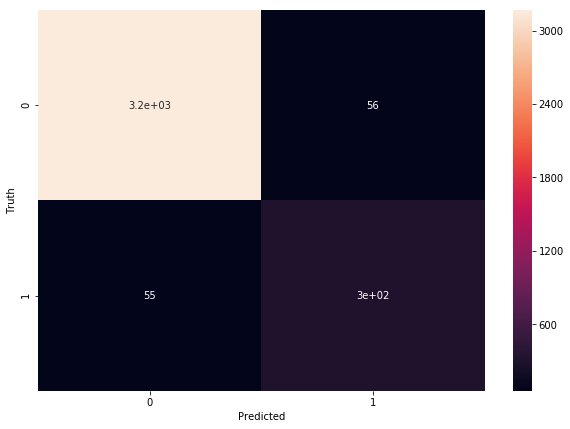

In [21]:
%matplotlib inline
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

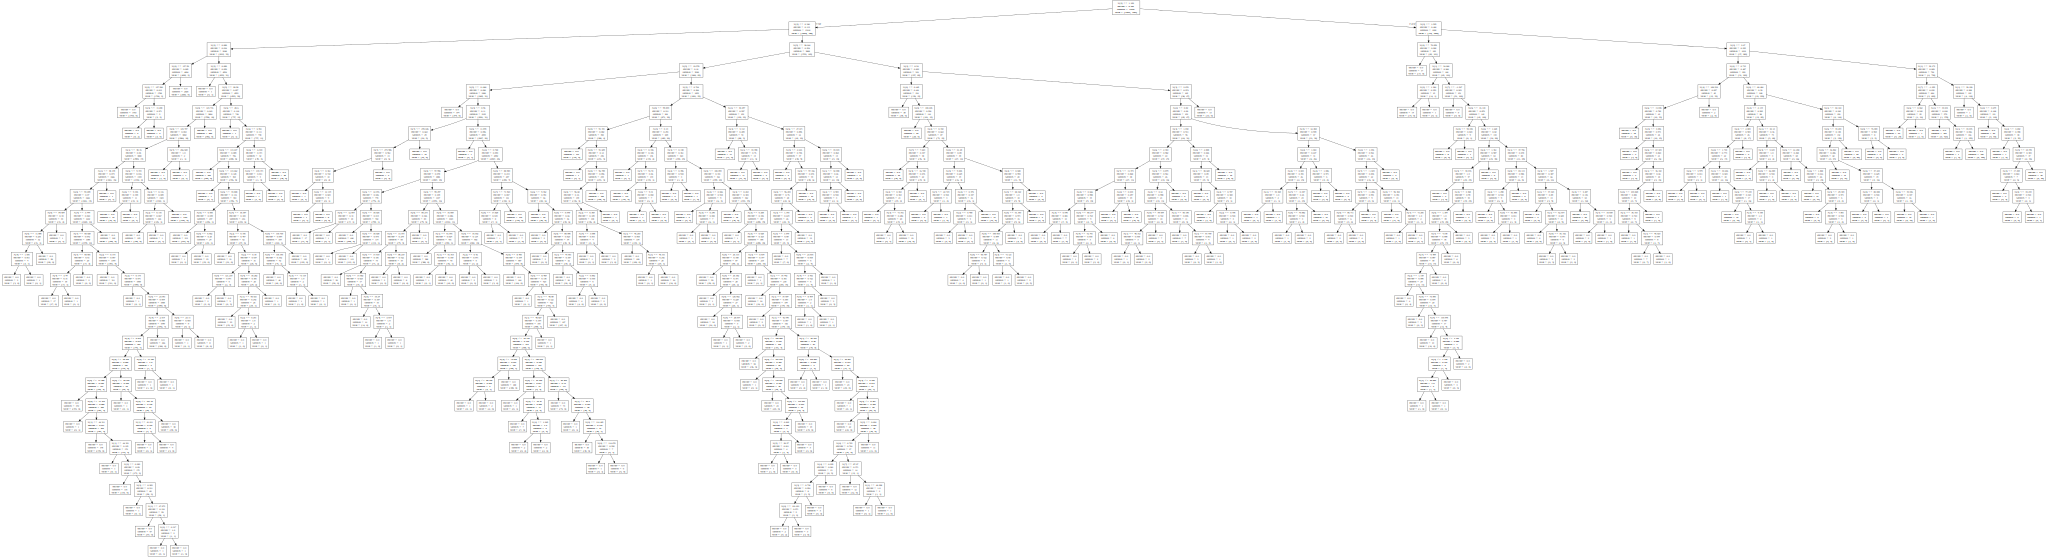

In [22]:
export_graphviz(arbolE, out_file='arbolEntropy.dot') #graficando arbol
with open('arbolEntropy.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

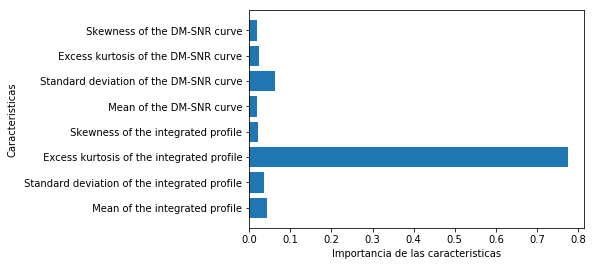

In [23]:
caract = x.shape[1]
plt.barh(range(caract), arbolE.feature_importances_)
plt.yticks(np.arange(caract), x.columns.values)
plt.xlabel('Importancia de las caracteristicas')
plt.ylabel('Caracteristicas')
plt.show()

# RandomForest

In [24]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()                           #creando modelo
forest.fit(x_train, y_train)                             #entrenando modelo

c:\users\fhern\documents\virtualenv\virtualenvmd\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [25]:
forest.score(x_test, y_test) #probando modelo

0.9782122905027933

In [26]:
forest.score(x_train, y_train) #verificando sobreentrenamiento 

0.9978348931415002

In [27]:
y_predicted_forest = forest.predict(x_test) 
cm = confusion_matrix(y_test, y_predicted_forest) 
cm #matriz de confusión

array([[3206,   16],
       [  62,  296]], dtype=int64)

Text(69,0.5,'Truth')

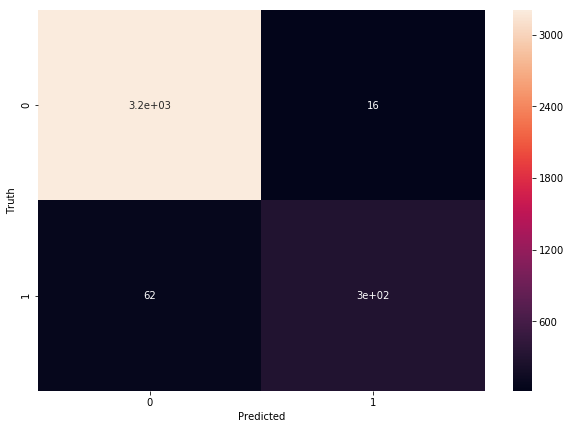

In [28]:
%matplotlib inline
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

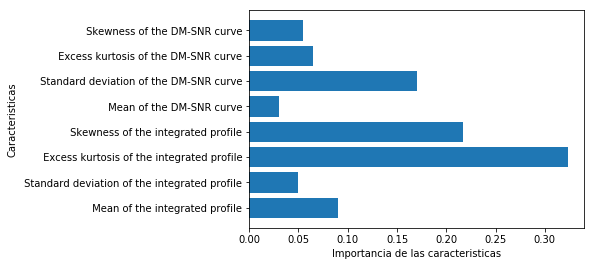

In [29]:
caract = x.shape[1]
plt.barh(range(caract), forest.feature_importances_)
plt.yticks(np.arange(caract), x.columns.values)
plt.xlabel('Importancia de las caracteristicas')
plt.ylabel('Caracteristicas')
plt.show()

# Gaussian Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [31]:
gnb.score(x_test, y_test)

0.9463687150837988

In [32]:
y_predicted_gaussian = gnb.predict(x_test) 
cm = confusion_matrix(y_test, y_predicted_gaussian) 
cm #matriz de confusión

array([[3094,  128],
       [  64,  294]], dtype=int64)

Text(69,0.5,'Truth')

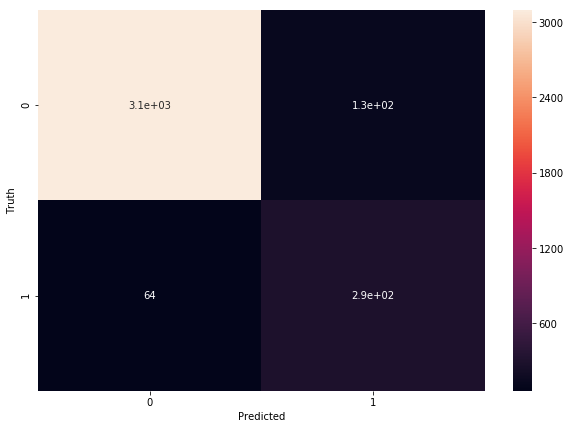

In [33]:
%matplotlib inline
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Adaboost

In [34]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier() #creando modelo
ada.fit(x_train, y_train)  #entrenando modelo

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [35]:
ada.score(x_test, y_test) #probando modelo

0.9720670391061452

In [36]:
ada.score(x_train, y_train) #verificando sobreentrenamiento

0.9802346696465987

In [37]:
y_predicted_ada = ada.predict(x_test)
cm = confusion_matrix(y_test, y_predicted_ada)
cm #matriz de confusión

array([[3208,   14],
       [  86,  272]], dtype=int64)

Text(69,0.5,'Truth')

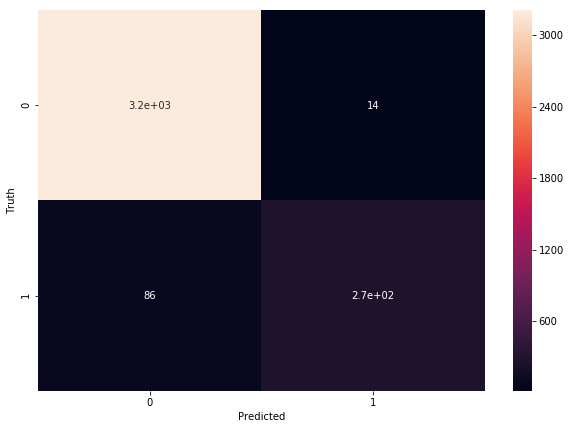

In [38]:
%matplotlib inline
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [39]:
x.columns.values

array([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve',
       ' Skewness of the DM-SNR curve'], dtype=object)

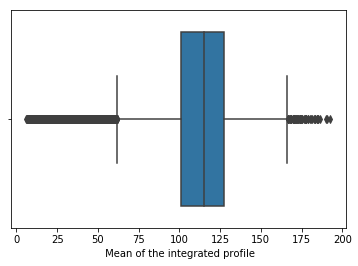

In [40]:
sn.boxplot(x=pulsarStars[' Mean of the integrated profile'])

In [41]:
from sklearn.decomposition import FactorAnalysis
factor = FactorAnalysis(n_components=6).fit(x)
pd.DataFrame(factor.components_, columns = x.columns.values)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
0,4.275428,0.232881,-0.255921,-1.414597,-11.648825,-11.865277,4.228305,106.389139
1,-16.654300,-1.728239,0.721932,3.846449,23.973337,12.124167,-1.170906,4.873802
2,18.928113,3.833123,-0.596805,-2.763308,11.877015,5.080598,-0.542801,1.037153
3,-0.475335,0.406674,-0.043799,-0.227683,4.002345,-8.020775,0.488651,-0.484878
4,-1.606462,4.663378,-0.218894,-2.471840,-0.222494,0.349750,-0.024353,0.010372
5,0.561528,2.486391,0.336610,2.576541,-0.235861,-0.190362,-0.042752,0.001430


In [42]:
matrizCorr = x.corr()
matrizCorr

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
Mean of the integrated profile,1.000000,0.547137,-0.873898,-0.738775,-0.298841,-0.307016,0.234331,0.144033
Standard deviation of the integrated profile,0.547137,1.000000,-0.521435,-0.539793,0.006869,-0.047632,0.029429,0.027691
Excess kurtosis of the integrated profile,-0.873898,-0.521435,1.000000,0.945729,0.414368,0.432880,-0.341209,-0.214491
Skewness of the integrated profile,-0.738775,-0.539793,0.945729,1.000000,0.412056,0.415140,-0.328843,-0.204782
Mean of the DM-SNR curve,-0.298841,0.006869,0.414368,0.412056,1.000000,0.796555,-0.615971,-0.354269
Standard deviation of the DM-SNR curve,-0.307016,-0.047632,0.432880,0.415140,0.796555,1.000000,-0.809786,-0.575800
Excess kurtosis of the DM-SNR curve,0.234331,0.029429,-0.341209,-0.328843,-0.615971,-0.809786,1.000000,0.923743
Skewness of the DM-SNR curve,0.144033,0.027691,-0.214491,-0.204782,-0.354269,-0.575800,0.923743,1.000000


In [43]:
np.linalg.det(matrizCorr)

4.439418150300753e-05

In [44]:
nuevoX = pulsarStars.drop(['target_class', ' Standard deviation of the integrated profile', ' Standard deviation of the DM-SNR curve', ' Excess kurtosis of the DM-SNR curve'], axis='columns')
nuevoX.head()

,Mean of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Skewness of the DM-SNR curve
0,140.562500,-0.234571,-0.699648,3.199833,74.242225
1,102.507812,0.465318,-0.515088,1.677258,127.393580
2,103.015625,0.323328,1.051164,3.121237,63.171909
3,136.750000,-0.068415,-0.636238,3.642977,53.593661
4,88.726562,0.600866,1.123492,1.178930,252.567306


In [45]:
nx_train, nx_test, ny_train, ny_test = train_test_split(nuevoX, y, test_size=0.2) #separando datos de entrenamiento y prueba

In [46]:
nuevoArbol = DecisionTreeClassifier()
nuevoArbol.fit(nx_train, ny_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [47]:
nuevoArbol.score(nx_test, ny_test)

0.9659217877094972

In [48]:
y_predicted = nuevoArbol.predict(nx_test) #matriz de confusión
cm = confusion_matrix(ny_test, y_predicted)
cm

array([[3183,   68],
       [  54,  275]], dtype=int64)

In [65]:
nuevoRF = RandomForestClassifier()
nuevoRF.fit(nx_train, ny_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [64]:
nuevoRF.score(nx_test, ny_test)

0.9770949720670391

In [51]:
y_predicted = nuevoRF.predict(nx_test) #matriz de confusión
cm = confusion_matrix(ny_test, y_predicted)
cm

array([[3222,   29],
       [  53,  276]], dtype=int64)

In [52]:
pulsarStars.dtypes

 Mean of the integrated profile                  float64
 Standard deviation of the integrated profile    float64
 Excess kurtosis of the integrated profile       float64
 Skewness of the integrated profile              float64
 Mean of the DM-SNR curve                        float64
 Standard deviation of the DM-SNR curve          float64
 Excess kurtosis of the DM-SNR curve             float64
 Skewness of the DM-SNR curve                    float64
target_class                                       int64
dtype: object

# Validacion

In [53]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=4)
kf

KFold(n_splits=4, random_state=None, shuffle=False)

In [54]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index, test_index)

(array([3, 4, 5, 6, 7, 8]), array([0, 1, 2]))
(array([0, 1, 2, 5, 6, 7, 8]), array([3, 4]))
(array([0, 1, 2, 3, 4, 7, 8]), array([5, 6]))
(array([0, 1, 2, 3, 4, 5, 6]), array([7, 8]))


In [55]:
def get_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    return model.score(x_test, y_test)

In [56]:
print(get_score(arbol, x_train, x_test, y_train, y_test),
get_score(arbolE, x_train, x_test, y_train, y_test),
get_score(forest, x_train, x_test, y_train, y_test),
get_score(gnb, x_train, x_test, y_train, y_test))

(0.9681564245810056, 0.9687150837988827, 0.9776536312849162, 0.9463687150837988)


In [57]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=100)
folds

StratifiedKFold(n_splits=100, random_state=None, shuffle=False)

In [58]:
score_arbol = []
score_arbolE = []
score_forest = []
score_gnb = []

In [59]:
from sklearn.model_selection import cross_val_score
score_arbol = cross_val_score(arbol, x, y, cv=100)
score_arbolE = cross_val_score(arbolE, x, y, cv=100)
score_forest = cross_val_score(forest, x, y, cv=100)
score_gnb = cross_val_score(gnb, x, y, cv=100)

In [60]:
print("Score Final Arbol gini: ", score_arbol.mean())
print("Score Final Arbol entropia: ", score_arbolE.mean())
print("Score Final Random Forest: ", score_forest.mean())
print("Score Final Gaussian naive bayer: ", score_gnb.mean())

('Score Final Arbol gini: ', 0.9680432594731446)
('Score Final Arbol entropia: ', 0.9697177271427475)
('Score Final Random Forest: ', 0.9783190983337867)
('Score Final Gaussian naive bayer: ', 0.944921069333724)
